In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
fifa_data = pd.read_csv('new_data.csv')

## Analiza Rozkładu Wybranyh Cech

Rozkład cech `Overall`, `Age`, `Height`, `Weight` wg `Position`

<Figure size 864x576 with 0 Axes>

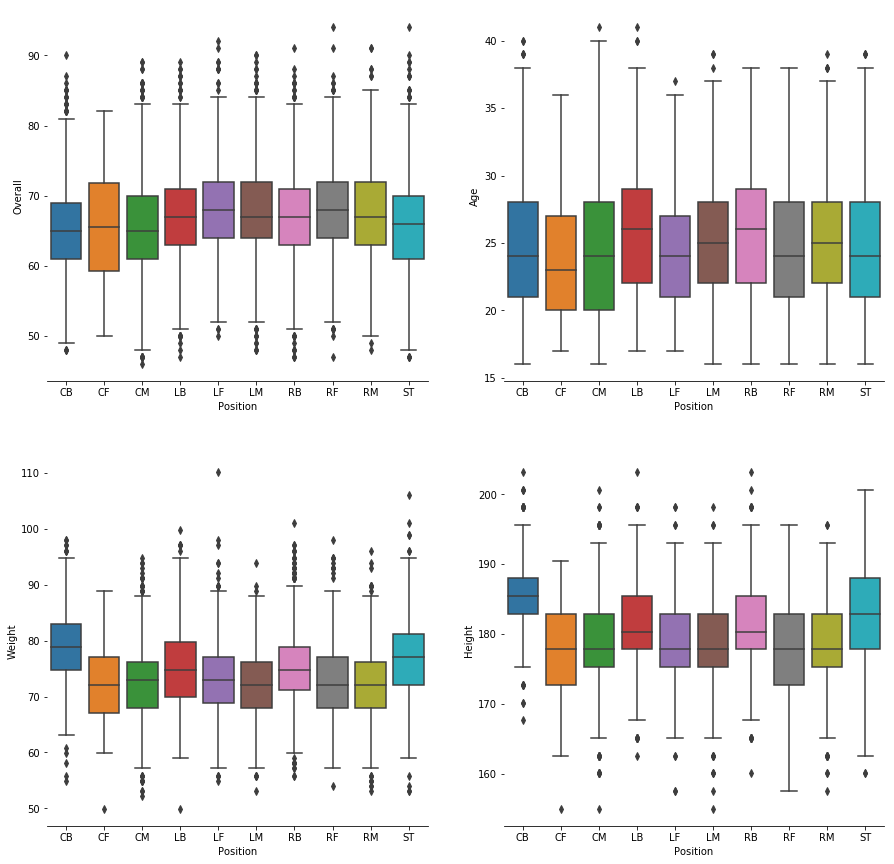

In [43]:
plt.figure(figsize=(12, 8))

f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
sns.despine(left=True)

positions = sorted(fifa_data['Position'].unique())

sns.boxplot('Position', 'Overall', data = fifa_data, ax=axes[0, 0], order=positions)
sns.boxplot('Position', 'Age', data = fifa_data, ax=axes[0, 1],order=positions)
sns.boxplot('Position', 'Height', data = fifa_data, ax=axes[1, 1], order=positions)
sns.boxplot('Position', 'Weight', data = fifa_data, ax=axes[1, 0], order=positions)

Rozkład `Preferred Foot` pomiedzy kategoriami `Position`

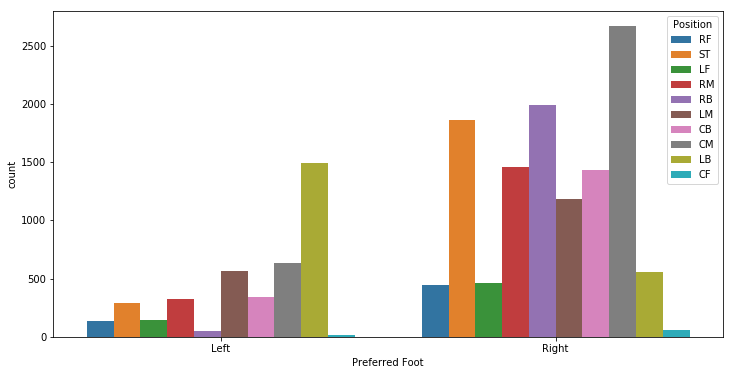

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='Preferred Foot', data=fifa_data, hue='Position')